In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from util import load_events, plot_event

In [2]:
events = load_events('toy_dataset.csv', chamber_id='1,2', start=0, end=10)

Stations selected are:  [1 2]


In [3]:
# select one event
idx = 4
df  = events[idx]

In [4]:
a,x,z = df[['a','x','z']].values.astype(np.float32).T
data      = np.column_stack([a,x,z])

In [5]:
# scaling the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [6]:
# create DBSCAN instance
db = DBSCAN(eps=0.8, min_samples=5)

In [7]:
# actually algorithm
db.fit(data)

DBSCAN(eps=0.8)

In [8]:
# how many clusters found
print ('There are',np.unique(db.labels_).shape[0],  'clusters found by DBSCAN')
print ('There are', len(np.unique(df.particle_id)), 'particles in this event')

There are 3 clusters found by DBSCAN
There are 7 particles in this event


In [9]:
# print clusters labels
db.labels_

array([ 0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,
        0,  1,  1,  1,  1])

In [10]:
# let's invistigate the cluster == 0 
reco_track = df.iloc[db.labels_ == 0,:]

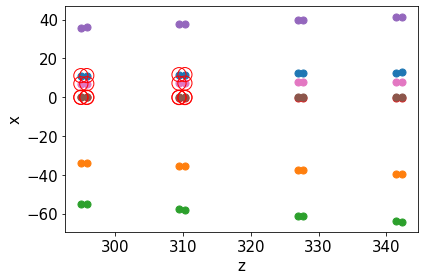

In [11]:
# plot the found cluster
plot_event(df,'z,x')
plt.scatter(reco_track.z, reco_track.x, facecolors='none', edgecolors='r', s=200)